# Cleaned Analysis of June 26 2023 Linus Flights
## Purpose
* Use the consistent reduction equations to produce cruise data results for Linus.  
* Store the results for comparison
* Keep the plots standard for uses.  
## Methods
Only cruise analysis, but from two data-sets so two different flights, using different but identical batteries
## Results


## Naming and Folders

In [1]:
### Definining name of analysis ###
name = '2023-05-26_LinusSteadyLevel_100Hz_Cleaned'
data_path = '../../data/'
data_folder = 'linus-2023-05-26'
file_name_ls = '00000003.BIN'
file_name_hs = '00000004.BIN'

datasave_path = data_path+data_folder+'/'
result_path = '../Results/'+name+'/'
figure_path = '../Figures/'+name+'/'

## Importing Packages and Libraries

In [2]:
from os import sys
import os
sys.path.append('../../')

%matplotlib widget

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

import main
from main import flight
from main import analysis
import propellers
import motors
from aircraft import airplane
import cl_finders

## Creating Folders for Results/Data ###
if not os.path.exists(result_path):
    os.makedirs(result_path)
if not os.path.exists(figure_path):
    os.makedirs(figure_path)
if not os.path.exists(data_path+data_folder):
    os.makedirs(data_path+data_folder)

# Setting Plot Defaults
plt.style.use('../../basic_plotter.mplstyle')

## Importing Data

In [3]:
# Importing data, specifying import characteristics, backing up results
rate = "10ms"
interpolateM = "linear"
processor = "Linus"

# Importing data
df_ls = main.data_load(data_path, data_folder, file_name_ls, "10ms", "linear", "ArduPlane_4_3_3")
df_hs = main.data_load(data_path, data_folder, file_name_hs, "10ms", "linear", "ArduPlane_4_3_3")

In [4]:
build_turbulent = pd.read_pickle("../../DragBuilds/Linus_DragBuildTurbulent.pkl")
build_laminar = pd.read_pickle("../../DragBuilds/Linus_DragBuildLaminar.pkl")

## Defining Vehicle Parameters

In [5]:
# Defining vehicle
prop = propellers.aeronaut11x7_estimatedBEN() # Using aeronaut 20x8 for this flight
motor = motors.U7V2_280KV()  # Using U7 V2 motor

mass = 1.563 + 0.230    # Valid for both flights
span = 2.54
chord = 0.149
linus = airplane(mass, chord, span)
linus.area = 0.367
linus.AR = 17.583

## Manually Selecting Mask by Plots

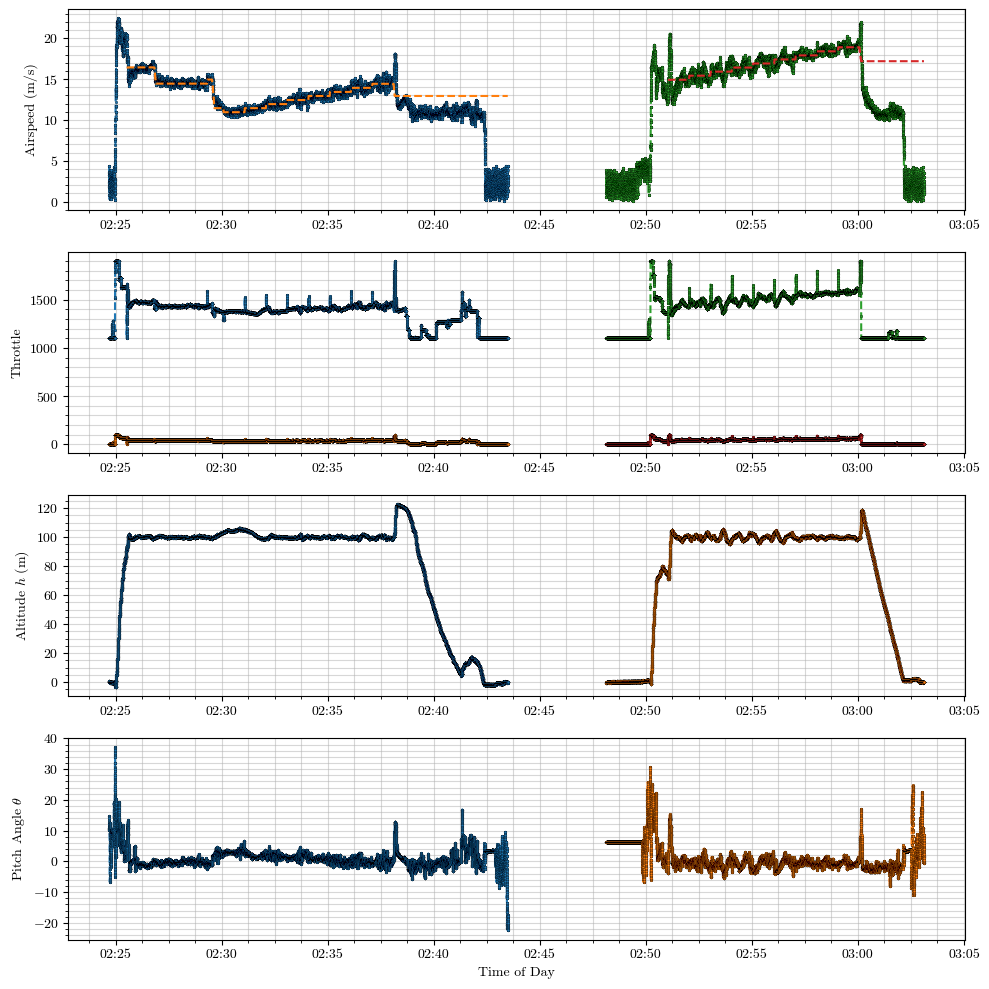

In [6]:
# Creating plots to segment data

plt.figure(figsize=(10,10))
ax0 = plt.subplot(4,1,1)
# plt.grid(which='major', linestyle='-')
# plt.grid(which='minor', linestyle=':', color='grey')
plt.plot(df_ls.index, df_ls.Airspeed_Sensor0, linestyle='--',label="Airspeed sensor (EAS)")
plt.plot(df_ls.index, df_ls.Airspeed_Demanded, linestyle='--',marker='', label="Demanded Airspeed (EAS)")
plt.plot(df_hs.index, df_hs.Airspeed_Sensor0, linestyle='--')
plt.plot(df_hs.index, df_hs.Airspeed_Demanded, linestyle='--',marker='')

plt.ylabel("Airspeed (m/s)")
ax1 = plt.subplot(4,1,2, sharex=ax0)
plt.plot(df_ls.index, df_ls.ThrottleOut, linestyle='--', label='Throttle PWM Output')
plt.plot(df_ls.index, df_ls.Throttle, linestyle='--', label='Throttle Percent')
plt.plot(df_hs.index, df_hs.ThrottleOut, linestyle='--')
plt.plot(df_hs.index, df_hs.Throttle, linestyle='--')
plt.ylabel("Throttle")
ax2 = plt.subplot(4,1,3, sharex=ax0)
plt.plot(df_ls.index, df_ls.Altitude_BARO_0, linestyle='--')
plt.plot(df_hs.index, df_hs.Altitude_BARO_0, linestyle='--')
plt.ylabel("Altitude $h$ (m)")
ax3 = plt.subplot(4,1,4, sharex=ax0)
plt.plot(df_ls.index, df_ls.PitchAngle, linestyle='--')
plt.plot(df_hs.index, df_hs.PitchAngle, linestyle='--')
plt.ylabel("Pitch Angle $\\theta$ ")
plt.xlabel('Time (GMT)')
plt.show()

## Results of Manual Segmentation

In [7]:
# Cruise Masking

ls_segtimes = np.array([['02:29:40','02:30:04'],
                      ['02:30:06','02:31:04'],
                      ['02:31:05','02:32:04'],
                      ['02:32:06','02:33:04'],
                      ['02:33:06','02:34:05'],
                      ['02:34:06','02:35:05'],
                      ['02:35:06','02:36:05'],
                      ['02:36:07','02:37:05'],
                      ['02:37:07','02:38:06']])
hs_segtimes = np.array([['02:51:30','02:52:02'],
                      ['02:52:04','02:53:02'],
                      ['02:53:04','02:54:02'],
                      ['02:54:04','02:55:03'],
                      ['02:55:04','02:56:03'],
                      ['02:56:04','02:57:03'],
                      ['02:57:05','02:58:03'],
                      ['02:58:05','02:59:03'],
                      ['02:59:05','03:00:04']])
year = 2023
month = 5
day = 27

masks_ls = cl_finders.get_maskarray(df_ls, ls_segtimes, year, month, day)
masks_hs = cl_finders.get_maskarray(df_hs, hs_segtimes, year, month, day)

## Checking Segments for Good Data

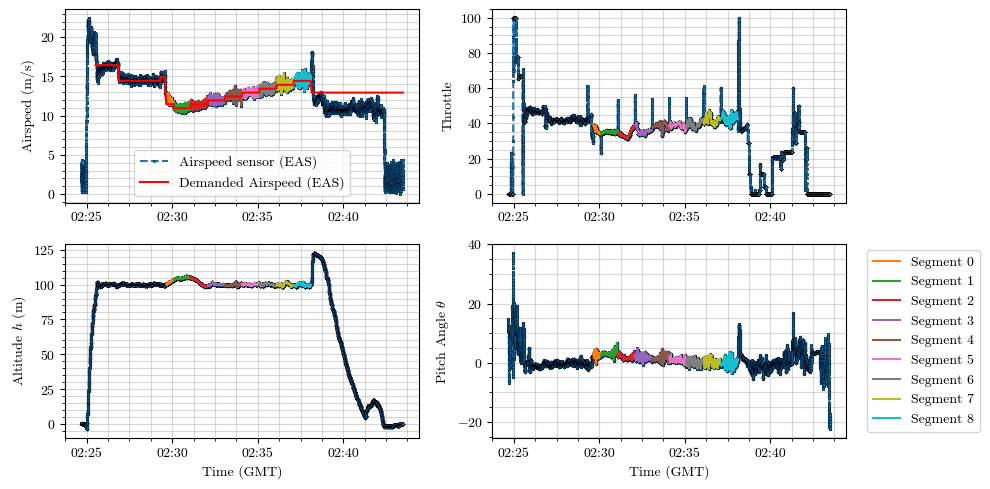

In [79]:
# Creating plots to segment data

cruise_segmentation_visualized = plt.figure(figsize=(10,5))
ax0 = plt.subplot(2,2,1)
# plt.grid(which='major', linestyle='-')
# plt.grid(which='minor', linestyle=':', color='grey')
plt.plot(df_ls.index, df_ls.Airspeed_Sensor0, linestyle='--',label="Airspeed sensor (EAS)")
for i in np.arange(len(masks_ls)):
    plt.plot(df_ls.Airspeed_Sensor0[masks_ls[i]], marker='', linestyle='solid')
plt.plot(df_ls.index, df_ls.Airspeed_Demanded, linestyle='solid',marker='', color='red', label="Demanded Airspeed (EAS)")

# plt.plot(df_hs.index, df_hs.Airspeed_Sensor0, linestyle='--')
# plt.plot(df_hs.index, df_hs.Airspeed_Demanded, linestyle='solid',marker='', color='orange')
ax0.legend()

plt.ylabel("Airspeed (m/s)")
ax1 = plt.subplot(2,2,2, sharex=ax0)
# plt.plot(df_ls.index, df_ls.ThrottleOut, linestyle='--', label='Throttle PWM Output')
plt.plot(df_ls.index, df_ls.Throttle, linestyle='--', label='Throttle Percent')
for i in np.arange(len(masks_ls)):
    plt.plot(df_ls.Throttle[masks_ls[i]], marker='', linestyle='solid', label="Segment " + str(i))
# plt.plot(df_hs.index, df_hs.ThrottleOut, linestyle='--')
# plt.plot(df_hs.index, df_hs.Throttle, linestyle='--')
plt.ylabel("Throttle")
ax2 = plt.subplot(2,2,3, sharex=ax0)
plt.plot(df_ls.index, df_ls.Altitude_BARO_0, linestyle='--')
for i in np.arange(len(masks_ls)):
    plt.plot(df_ls.Altitude_BARO_0[masks_ls[i]], marker='', linestyle='solid', label="Segment " + str(i))
ax2.set_xlabel('Time (GMT)')
# plt.plot(df_hs.index, df_hs.Altitude_BARO_0, linestyle='--')
plt.ylabel("Altitude $h$ (m)")
ax3 = plt.subplot(2,2,4, sharex=ax0)
plt.plot(df_ls.index, df_ls.PitchAngle, linestyle='--')
for i in np.arange(len(masks_ls)):
    plt.plot(df_ls.PitchAngle[masks_ls[i]], marker='', linestyle='solid', label="Segment " + str(i))
# plt.plot(df_hs.index, df_hs.PitchAngle, linestyle='--')
plt.ylabel("Pitch Angle $\\theta$ ")
plt.xlabel('Time (GMT)')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.show()
main.save_figure(cruise_segmentation_visualized, f'{cruise_segmentation_visualized=}'.split('=')[0], figure_path, overwrite=True)

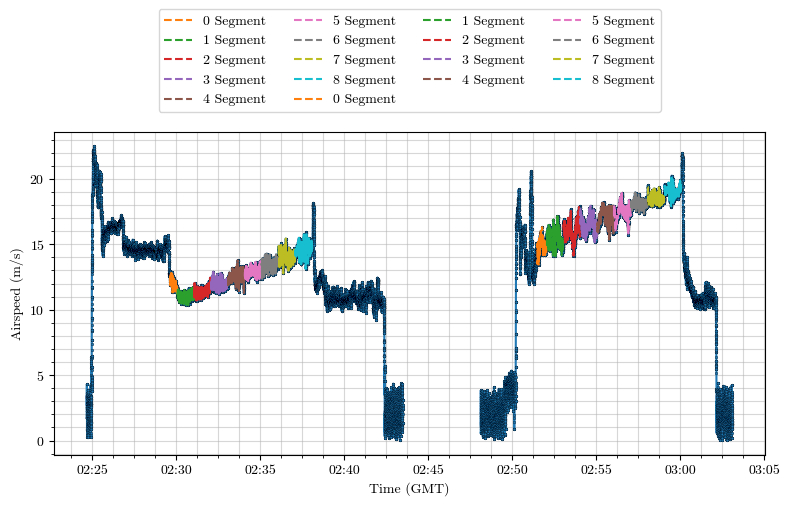

In [35]:
# Airspeed for Segments
timeindex_v_segmented = plt.figure(figsize=(8,5), dpi=100)
plt.plot(df_ls.index, df_ls.Airspeed_Sensor0)
for i in np.arange(len(masks_ls)):
    plt.plot(df_ls.Airspeed_Sensor0[masks_ls[i]], marker='', linestyle='--', label=str(i) + " Segment")
plt.plot(df_hs.index, df_hs.Airspeed_Sensor0)
for i in np.arange(len(masks_hs)):
    plt.plot(df_hs.Airspeed_Sensor0[masks_hs[i]], marker='', linestyle='--', label=str(i) + " Segment")

plt.ylabel("Airspeed (m/s)")
plt.xlabel("Time (GMT)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4),
          ncol=4, fancybox=True)
plt.tight_layout()
plt.show()
# main.save_figure(timeindex_v_segmented, f'{timeindex_v_segmented=}'.split('=')[0], figure_path)

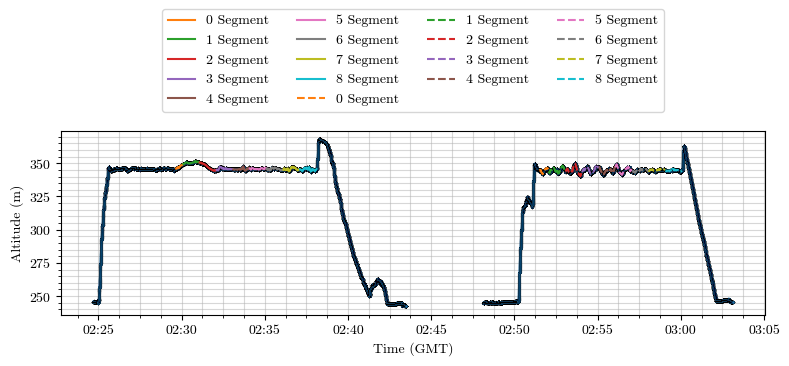

In [31]:
# Altitude for Segments
timeindex_h_segmented = plt.figure(figsize=(8,5), dpi=100)
plt.plot(df_ls.index, df_ls.Altitude_POS)
for i in np.arange(len(masks_ls)):
    plt.plot(df_ls.Altitude_POS[masks_ls[i]], marker='', linestyle='solid', label=str(i) + " Segment")
plt.plot(df_hs.index, df_hs.Altitude_POS)
for i in np.arange(len(masks_hs)):
    plt.plot(df_hs.Altitude_POS[masks_hs[i]], marker='', linestyle='--', label=str(i) + " Segment")

plt.ylabel("Altitude (m)")
plt.xlabel("Time (GMT)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.7),
          ncol=4, fancybox=True)
plt.tight_layout()
plt.show()
# main.save_figure(timeindex_h_segmented, f'{timeindex_h_segmented=}'.split('=')[0], figure_path)

## Main Analysis: Getting P_{req} CL CD

In [11]:
# # Estimated propulsive power (New Fitting)
# P_ct_ls = cl_finders.thrust_steady(prop, rho, v_tas, n)
# P_ct_ls = P_ct_ls + Vd_tas * linus.weight
# # Getting drag coefficient
# Cd_ct_ls = cl_finders.preq2cd(linus, v_tas, q, P_ct_ls)

# # Getting lift coefficient
# CL_ls = cl_finders.cl_banked(linus, q, phi)

In [12]:
# Main Analysis (Low Speed)
# Attitude 
phi = np.deg2rad(df_ls["RollAngle"].to_numpy())            # Bank angle in radians
pitch = np.deg2rad(df_ls["PitchAngle"].to_numpy())         # Pitch angle in radians

# Inertial Measurement Unit
U_dot = df_ls["XAcc_IMU0"].to_numpy()                       # Acceleration in X direction

# Atmospheric adjustments:
rho = df_ls["Pressure_BARO0"].to_numpy() * (287 * (df_ls["Temperature_ARSP"].to_numpy()+273.15))**-1             # Density found from barometer pressure & airspeed sensor temperatures
v_eas = df_ls["Airspeed_Sensor0"].to_numpy()                               # Equivalent SSL airspeed (m/s)
v_tas = v_eas * np.sqrt(1.225) * np.sqrt(rho)**-1   # the true airspeed
q = 0.5 * rho * v_tas**2                            # Dynamic pressure 

# For Descent method
h = df_ls["Altitude_POS"].to_numpy()                   # Altitude
Vd_eas = df_ls["DescentRate"].to_numpy()                  # Descent Rate from EKF (is it true or EAS at SSL?)
Vd_tas = Vd_eas * np.sqrt(1.225) * np.sqrt(rho)**-1   # the true airspeed

# Ground speed limiter
v_dem = df_ls["Airspeed_Demanded"].to_numpy()

# Propulsion characterization
n = df_ls["MotorRPM"].to_numpy() / 60                               # Revolutions per second
i_esc = df_ls["MainBatteryCurrent"].to_numpy()
v_esc = df_ls["MainBatteryVoltage"].to_numpy()
J = v_tas / (n * prop.diameter)
eff = prop.efficiency(J) * motor.efficiency(n, i_esc)

# Estimated propulsive power (New Fitting)
P_ct_ls = cl_finders.thrust_steady(prop, rho, v_tas, n)
P_ct_h_ls = P_ct_ls + (linus.weight * Vd_tas)

# Getting drag coefficient
Cd_ct_ls = cl_finders.preq2cd(linus, v_tas, q, P_ct_ls)
Cd_ct_h_ls = cl_finders.preq2cd(linus, v_tas, q, P_ct_h_ls)

# Getting lift coefficient
CL_ls = cl_finders.cl_banked(linus, q, phi)

In [13]:
# Main Analysis (High Speed)
# Attitude 
phi = np.deg2rad(df_hs["RollAngle"].to_numpy())            # Bank angle in radians
pitch = np.deg2rad(df_hs["PitchAngle"].to_numpy())         # Pitch angle in radians

# Inertial Measurement Unit
U_dot = df_hs["XAcc_IMU0"].to_numpy()                       # Acceleration in X direction

# Atmospheric adjustments:
rho = df_hs["Pressure_BARO0"].to_numpy() * (287 * (df_hs["Temperature_ARSP"].to_numpy()+273.15))**-1             # Density found from barometer pressure & airspeed sensor temperatures
v_eas = df_hs["Airspeed_Sensor0"].to_numpy()                               # Equivalent SSL airspeed (m/s)
v_tas = v_eas * np.sqrt(1.225) * np.sqrt(rho)**-1   # the true airspeed
q = 0.5 * rho * v_tas**2                            # Dynamic pressure 

# For Descent method
h = df_hs["Altitude_POS"].to_numpy()                   # Altitude
Vd_eas = df_hs["DescentRate"].to_numpy()                  # Descent Rate from EKF (is it true or EAS at SSL?)
Vd_tas = Vd_eas * np.sqrt(1.225) * np.sqrt(rho)**-1   # the true airspeed

# Ground speed limiter
v_dem = df_hs["Airspeed_Demanded"].to_numpy()

# Propulsion characterization
n = df_hs["MotorRPM"].to_numpy() / 60                               # Revolutions per second
i_esc = df_hs["MainBatteryCurrent"].to_numpy()
v_esc = df_hs["MainBatteryVoltage"].to_numpy()
J = v_tas / (n * prop.diameter)
eff = prop.efficiency(J) * motor.efficiency(n, i_esc)

# Estimated propulsive power (New Fitting)
P_ct_hs = cl_finders.thrust_steady(prop, rho, v_tas, n)
P_ct_h_hs = P_ct_hs + (linus.weight * Vd_tas)

# Getting drag coefficient
Cd_ct_hs = cl_finders.preq2cd(linus, v_tas, q, P_ct_hs)
Cd_ct_h_hs = cl_finders.preq2cd(linus, v_tas, q, P_ct_h_hs)

# Getting lift coefficient
CL_hs = cl_finders.cl_banked(linus, q, phi)

## Plotting Time indexed Analysis

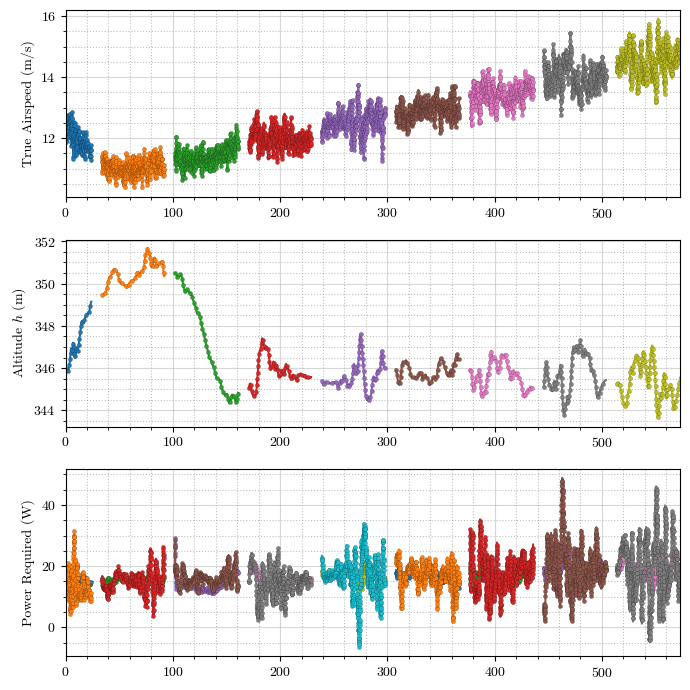

In [14]:
# Plotting Steady-level Data Runs #
markerstyle = 'o'
markerevery = 0.01
markedgew = 0.1
plt.figure(figsize=(7,7))
ax1 = plt.subplot(3,1,1)
t_init = 0
for i in range(len(masks_ls)):
    time_s = np.linspace(t_init, (len(df_ls[masks_ls[i]])-1)/100 + t_init, len(df_ls[masks_ls[i]]))
    ax1.plot(time_s, df_ls.Airspeed_Sensor0[masks_ls[i]], marker=markerstyle, markeredgecolor=[0,0,0], markersize=3, markevery=markerevery, markeredgewidth=markedgew)
    t_init = time_s[-1]+10
ax1.set_ylabel("True Airspeed (m/s)")
ax1.grid(which='major', linestyle='-')
ax1.grid(which='minor', linestyle=':', color='grey')
ax1.autoscale(enable=True, axis='x', tight=True)

ax0 = plt.subplot(3,1,2, sharex=ax1)
t_init = 0
for i in range(len(masks_ls)):
    time_s = np.linspace(t_init, (len(df_ls[masks_ls[i]])-1)/100 + t_init, len(df_ls[masks_ls[i]]))
    ax0.plot(time_s, df_ls.Altitude_POS[masks_ls[i]], marker=markerstyle, markeredgecolor=[0,0,0], markersize=3, markevery=markerevery, markeredgewidth=markedgew)
    t_init = time_s[-1]+10
ax0.set_ylabel("Altitude $h$ (m)")
ax0.grid(which='major', linestyle='-')
ax0.grid(which='minor', linestyle=':', color='grey')
ax0.autoscale(enable=True, axis='x', tight=True)

ax2 = plt.subplot(3,1,3, sharex=ax1)
t_init = 0
for i in range(len(masks_ls)):
    time_s = np.linspace(t_init, (len(df_ls[masks_ls[i]])-1)/100 + t_init, len(df_ls[masks_ls[i]]))
    ax2.plot(time_s, P_ct_ls[masks_ls[i]], marker=markerstyle, markeredgecolor=[0,0,0], markersize=3, markevery=markerevery, markeredgewidth=markedgew)
    ax2.plot(time_s, P_ct_h_ls[masks_ls[i]], marker=markerstyle, markeredgecolor=[0,0,0], markersize=3, markevery=markerevery, markeredgewidth=markedgew)
    t_init = time_s[-1]+10
ax2.set_ylabel("Power Required (W)")
ax2.grid(which='major', linestyle='-')
ax2.grid(which='minor', linestyle=':', color='grey')
ax2.autoscale(enable=True, axis='x', tight=True)

plt.tight_layout()
plt.show()

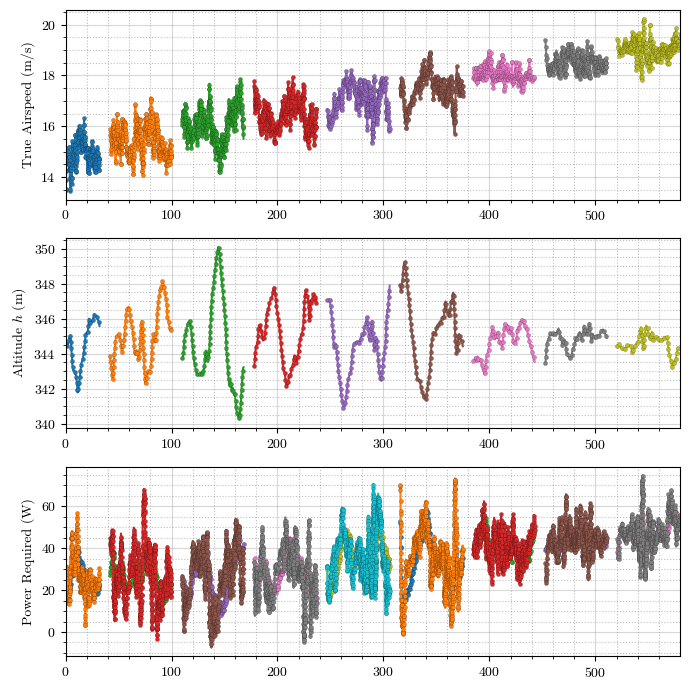

In [15]:
# Plotting Steady-level Data Runs #
markerstyle = 'o'
markerevery = 0.01
markedgew = 0.1
plt.figure(figsize=(7,7))
ax1 = plt.subplot(3,1,1)
t_init = 0
for i in range(len(masks_hs)):
    time_s = np.linspace(t_init, (len(df_hs[masks_hs[i]])-1)/100 + t_init, len(df_hs[masks_hs[i]]))
    ax1.plot(time_s, df_hs.Airspeed_Sensor0[masks_hs[i]], marker=markerstyle, markeredgecolor=[0,0,0], markersize=3, markevery=markerevery, markeredgewidth=markedgew)
    t_init = time_s[-1]+10
ax1.set_ylabel("True Airspeed (m/s)")
ax1.grid(which='major', linestyle='-')
ax1.grid(which='minor', linestyle=':', color='grey')
ax1.autoscale(enable=True, axis='x', tight=True)

ax0 = plt.subplot(3,1,2, sharex=ax1)
t_init = 0
for i in range(len(masks_hs)):
    time_s = np.linspace(t_init, (len(df_hs[masks_hs[i]])-1)/100 + t_init, len(df_hs[masks_hs[i]]))
    ax0.plot(time_s, df_hs.Altitude_POS[masks_hs[i]], marker=markerstyle, markeredgecolor=[0,0,0], markersize=3, markevery=markerevery, markeredgewidth=markedgew)
    t_init = time_s[-1]+10
ax0.set_ylabel("Altitude $h$ (m)")
ax0.grid(which='major', linestyle='-')
ax0.grid(which='minor', linestyle=':', color='grey')
ax0.autoscale(enable=True, axis='x', tight=True)

ax2 = plt.subplot(3,1,3, sharex=ax1)
t_init = 0
for i in range(len(masks_hs)):
    time_s = np.linspace(t_init, (len(df_hs[masks_hs[i]])-1)/100 + t_init, len(df_hs[masks_hs[i]]))
    ax2.plot(time_s, P_ct_hs[masks_hs[i]], marker=markerstyle, markeredgecolor=[0,0,0], markersize=3, markevery=markerevery, markeredgewidth=markedgew)
    ax2.plot(time_s, P_ct_h_hs[masks_hs[i]], marker=markerstyle, markeredgecolor=[0,0,0], markersize=3, markevery=markerevery, markeredgewidth=markedgew)
    t_init = time_s[-1]+10
ax2.set_ylabel("Power Required (W)")
ax2.grid(which='major', linestyle='-')
ax2.grid(which='minor', linestyle=':', color='grey')
ax2.autoscale(enable=True, axis='x', tight=True)

plt.tight_layout()
plt.show()

## Collecting Results from Two Flights \& Getting Stats

In [16]:
# Not altitude adjustment
CL_ls_total = cl_finders.total_segments_boolean(CL_ls, masks_ls)
Cd_ct_ls_total = cl_finders.total_segments_boolean(Cd_ct_ls, masks_ls)

CL_hs_total = cl_finders.total_segments_boolean(CL_hs, masks_hs)
Cd_ct_hs_total = cl_finders.total_segments_boolean(Cd_ct_hs, masks_hs)

CL_total = np.concatenate((CL_ls_total, CL_hs_total))
Cd_ct_total = np.concatenate((Cd_ct_ls_total, Cd_ct_hs_total))

[cl_means_ls, cl_stds_ls, cl_ci95s_ls, cd_means_ls, cd_stds_ls, cd_ci95s_ls] = cl_finders.collect_segments(masks_ls, CL_ls, Cd_ct_ls)
[cl_means_hs, cl_stds_hs, cl_ci95s_hs, cd_means_hs, cd_stds_hs, cd_ci95s_hs] = cl_finders.collect_segments(masks_hs, CL_hs, Cd_ct_hs)

cl_means = np.concatenate((cl_means_ls, cl_means_hs))
cl_stds = np.concatenate((cl_stds_ls, cl_stds_hs))
cl_ci95s = np.concatenate((cl_ci95s_ls, cl_ci95s_hs))

cd_means = np.concatenate((cd_means_ls, cd_means_hs))
cd_stds = np.concatenate((cd_stds_ls, cd_stds_hs))
cd_ci95s = np.concatenate((cd_ci95s_ls, cd_ci95s_hs))

In [17]:
# Altitude adjustment
CL_ls_total = cl_finders.total_segments_boolean(CL_ls, masks_ls)
Cd_ct_h_ls_total = cl_finders.total_segments_boolean(Cd_ct_h_ls, masks_ls)

CL_hs_total = cl_finders.total_segments_boolean(CL_hs, masks_hs)
Cd_ct_h_hs_total = cl_finders.total_segments_boolean(Cd_ct_h_hs, masks_hs)

CL_total = np.concatenate((CL_ls_total, CL_hs_total))
Cd_ct_h_total = np.concatenate((Cd_ct_h_ls_total, Cd_ct_h_hs_total))

[cl_means_ls, cl_stds_ls, cl_ci95s_ls, cd_h_means_ls, cd_h_stds_ls, cd_h_ci95s_ls] = cl_finders.collect_segments(masks_ls, CL_ls, Cd_ct_h_ls)
[cl_means_hs, cl_stds_hs, cl_ci95s_hs, cd_h_means_hs, cd_h_stds_hs, cd_h_ci95s_hs] = cl_finders.collect_segments(masks_hs, CL_hs, Cd_ct_h_hs)

cl_means = np.concatenate((cl_means_ls, cl_means_hs))
cl_stds = np.concatenate((cl_stds_ls, cl_stds_hs))
cl_ci95s = np.concatenate((cl_ci95s_ls, cl_ci95s_hs))

cd_h_means = np.concatenate((cd_h_means_ls, cd_h_means_hs))
cd_h_stds = np.concatenate((cd_h_stds_ls, cd_h_stds_hs))
cd_h_ci95s = np.concatenate((cd_h_ci95s_ls, cd_h_ci95s_hs))

## Collecting Data into Bins

In [18]:
# Collecting data into bins
bins=np.linspace(0.2, 0.7, 20)
[cl_means_bin, cl_stds_bin, cl_ci95s_bin, cd_means_bin, cd_stds_bin, cd_ci95s_bin] = cl_finders.collect_bins(bins, CL_total, Cd_ct_total)

## Plotting Results of Bins \& Segments

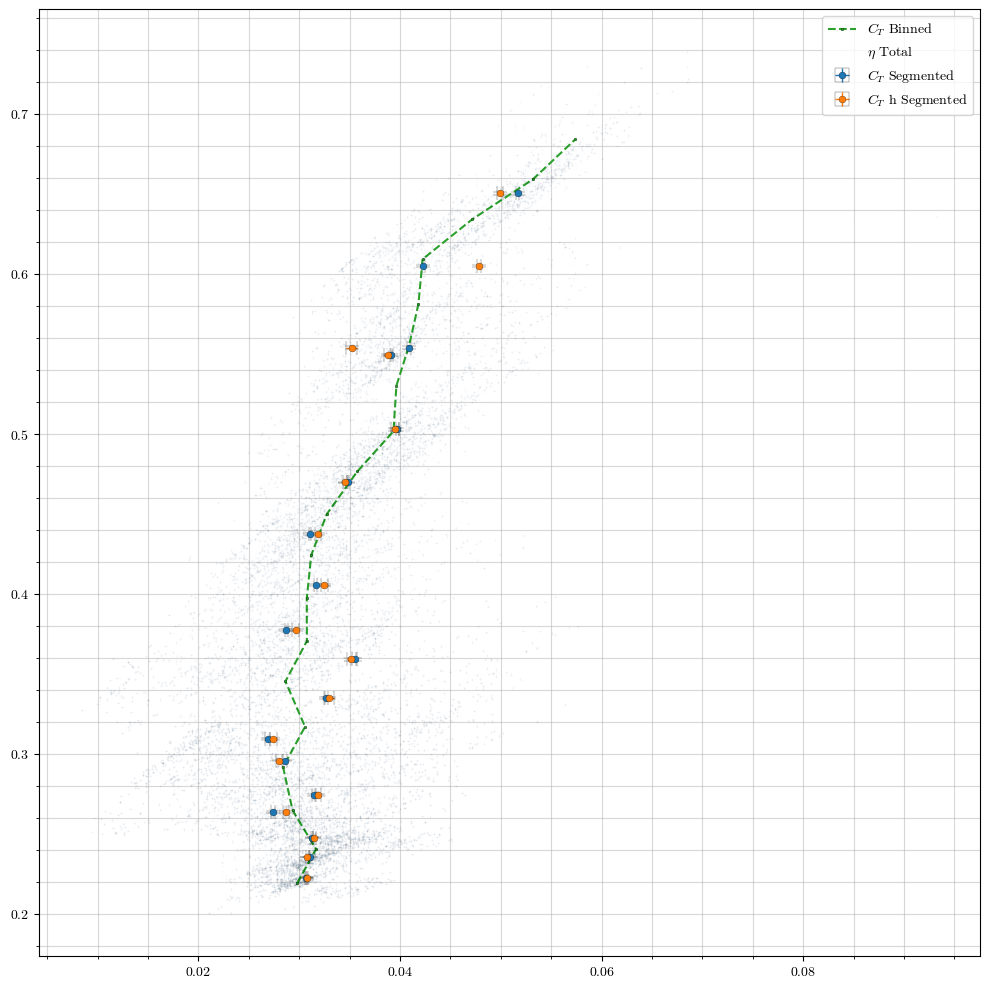

In [19]:
CruisePolar_RawANDsegmented = plt.figure(figsize=(10,10), dpi=100)
plt.errorbar(cd_means, cl_means, xerr=cd_ci95s, yerr=cl_ci95s, linestyle='', markersize = 10, capsize=5, elinewidth=1, label="$C_T$ Segmented")
plt.errorbar(cd_h_means, cl_means, xerr=cd_h_ci95s, yerr=cl_ci95s, linestyle='', markersize = 10, capsize=5, elinewidth=1, label="$C_T$ h Segmented")
plt.plot(cd_means_bin, cl_means_bin, linestyle='--', label="$C_T$ Binned")

plt.plot(Cd_ct_total, CL_total, linestyle='', color="C{}".format(0), alpha=0.01, marker='.', markersize=2, label="$\eta$ Total")
plt.legend()
plt.show()
main.save_figure(CruisePolar_RawANDsegmented, f'{CruisePolar_RawANDsegmented=}'.split('=')[0], figure_path, overwrite=True)

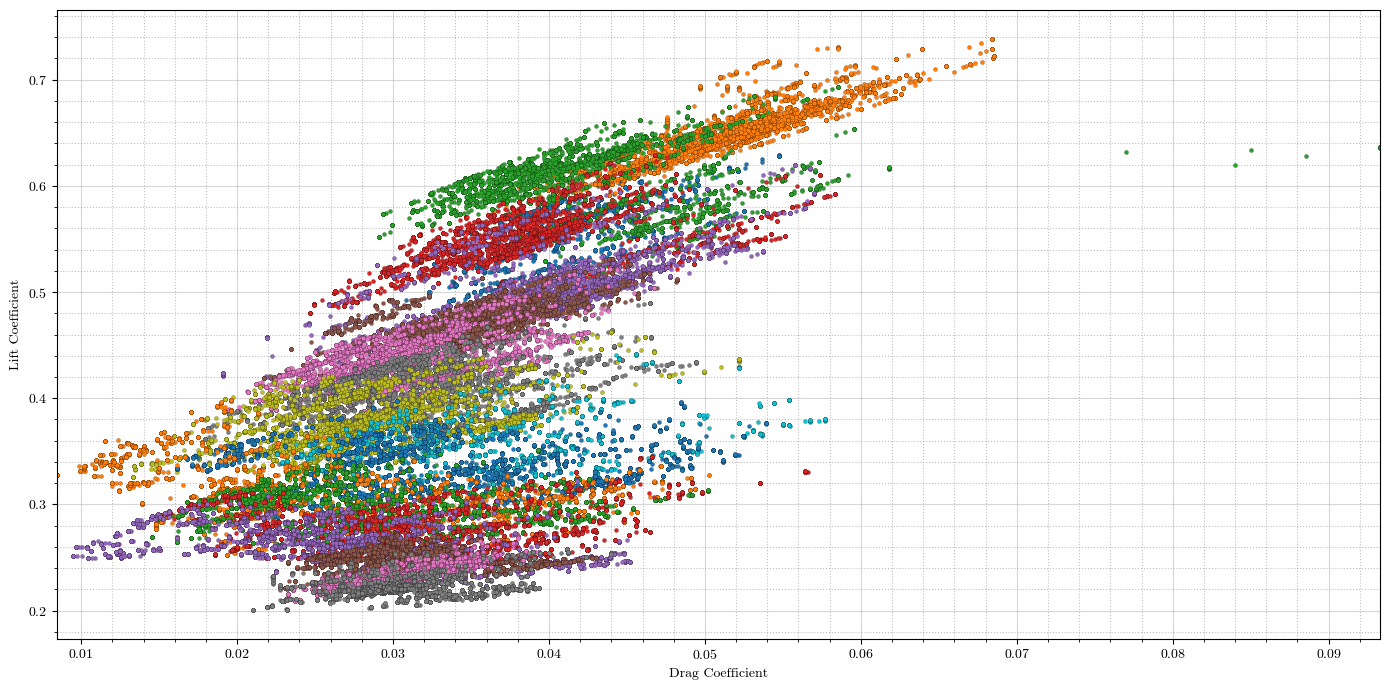

In [20]:
# Plotting the drag polar of the Vehicle

markerstyle = 'o'
markerevery = 1
markedgew = 0.1
plt.figure(figsize=(14,7))
ax1 = plt.subplot(1,1,1)
for i in range(len(masks_ls)):
    ax1.plot(Cd_ct_ls[masks_ls[i]], CL_ls[masks_ls[i]], marker=markerstyle, markeredgecolor=[0,0,0], markersize=3, markevery=markerevery, markeredgewidth=markedgew, linestyle='')
for i in range(len(masks_hs)):
    ax1.plot(Cd_ct_hs[masks_hs[i]], CL_hs[masks_hs[i]], marker=markerstyle, markeredgecolor=[0,0,0], markersize=3, markevery=markerevery, markeredgewidth=markedgew, linestyle='')

ax1.set_ylabel("Lift Coefficient")
ax1.set_xlabel("Drag Coefficient")
ax1.grid(which='major', linestyle='-')
ax1.grid(which='minor', linestyle=':', color='grey')
ax1.autoscale(enable=True, axis='x', tight=True)

plt.tight_layout()
plt.show()

## Performing Curve Fits to Find Polars

In [21]:
polar_ct = cl_finders.cd2polar(linus, cd_means, cl_means, highorder=False)
polar_cth = cl_finders.cd2polar(linus, cd_h_means, cl_means, highorder=False)

polar_ct_bin = cl_finders.cd2polar(linus, cd_means_bin, cl_means_bin, highorder=False)

print(polar_ct)
print(polar_cth)
print(polar_ct_bin)

-2.5027942896140343
-2.419872083495609
-1.9267500002846751
[0.0255502  0.36172065]
[0.02595494 0.37515209]
[0.0234076  0.29930176]


## Packaging Results

In [22]:
ct_cruise_segresult = cl_finders.packaging_binresults(CL_total, cl_means, cl_stds, cl_ci95s, Cd_ct_total, cd_means, cd_stds, cd_ci95s, polar_ct, linus)
cth_cruise_segresult = cl_finders.packaging_binresults(CL_total, cl_means, cl_stds, cl_ci95s, Cd_ct_h_total, cd_h_means, cd_h_stds, cd_h_ci95s, polar_cth, linus)
ct_cruise_binresult = cl_finders.packaging_binresults(CL_total, cl_means_bin, cl_stds_bin, cl_ci95s_bin, Cd_ct_total, cd_means_bin, cd_stds_bin, cd_ci95s_bin, polar_ct_bin, linus)

## Saving Results to Disk

In [23]:
# Saving results to their pickles
pd.to_pickle(ct_cruise_segresult, result_path+'ct_cruise_segresult.pkl')
pd.to_pickle(cth_cruise_segresult, result_path+'cth_cruise_segresult.pkl')
pd.to_pickle(ct_cruise_binresult, result_path+'ct_cruise_binresult.pkl')

## Additional Plots for Power Required

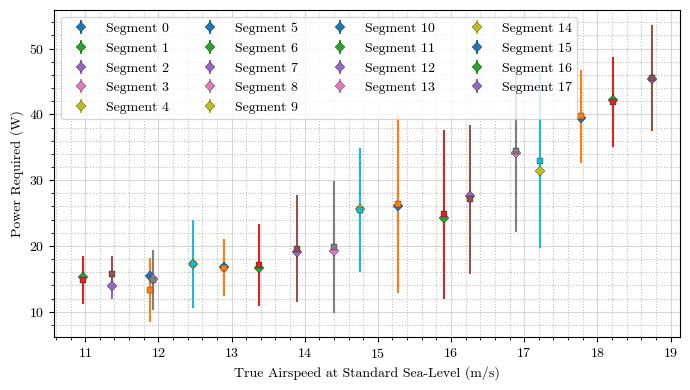

In [24]:
# Plot of Power Required Fits and Data #
[Pave_ct, EAS_Ct] = cl_finders.rawpolar2preqew(linus, cl_means, cd_means)
[Pave_cth, EAS_Cth] = cl_finders.rawpolar2preqew(linus, cl_means, cd_h_means)

CTPolar_SegmentedwBadData = plt.figure(figsize=(7,4), dpi=100)
for i in range(len(masks_ls)+len(masks_hs)):
    plt.errorbar(EAS_Ct[i], Pave_ct[i], yerr=cd_stds[i]*0.5*1.225*linus.area*EAS_Ct[i]**3 , label="Segment "+str(i), linestyle='', marker='D', markersize=5)
    plt.errorbar(EAS_Cth[i], Pave_cth[i], yerr=cd_h_stds[i]*0.5*1.225*linus.area*EAS_Cth[i]**3 , linestyle='', marker='s', markersize=5)
plt.xlabel("True Airspeed at Standard Sea-Level (m/s)")
plt.ylabel("Power Required (W)")
plt.legend(loc='best', ncol=4)
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':', color='grey')
plt.minorticks_on()
plt.tight_layout()
plt.show()
main.save_figure(CTPolar_SegmentedwBadData, f'{CTPolar_SegmentedwBadData=}'.split('=')[0], figure_path, overwrite=True)

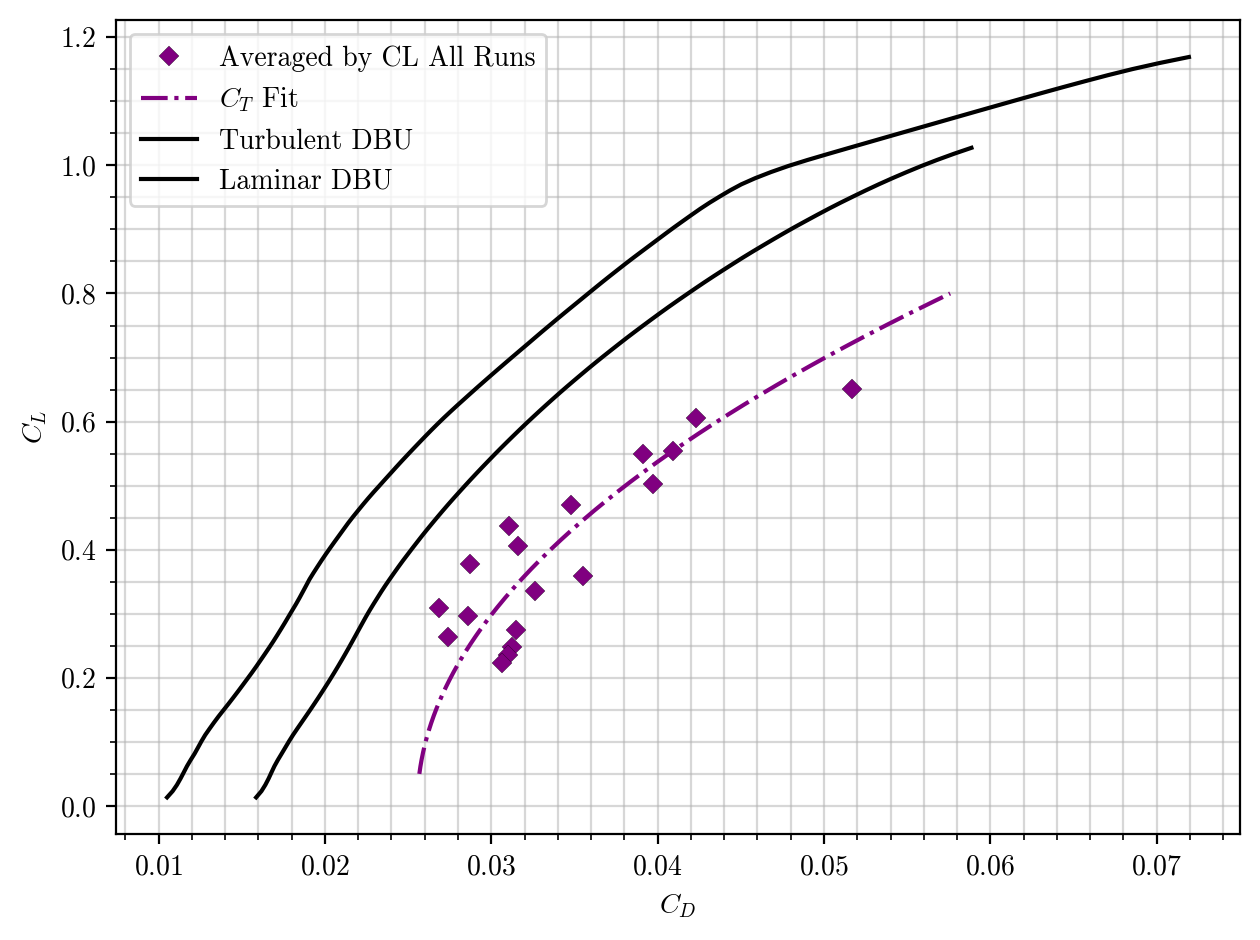

Plot already exists


In [25]:
[CL_fitted, CD_fitted] = cl_finders.plotfittedpolar(linus, polar_ct, [0.05, 0.8])

fig_dragpolar_context = plt.figure(dpi=200)



plt.plot(cd_means, cl_means, marker='D', color='purple', markeredgecolor=[0,0,0], markersize=5, markeredgewidth=markedgew, linestyle='', label='Averaged by CL All Runs')

plt.plot(CD_fitted, CL_fitted, marker='', color='purple', linestyle='-.', label="$C_T$ Fit")

plt.plot(build_turbulent.CD[:106], build_turbulent.CL[:106], marker='', color='black', linestyle='solid', label="Turbulent DBU")
plt.plot(build_laminar.CD, build_laminar.CL, marker='', color='black', linestyle='solid', label="Laminar DBU")

plt.legend()
plt.xlabel("$C_D$")
plt.ylabel("$C_L$")
plt.show()
main.save_figure(fig_dragpolar_context, f'{fig_dragpolar_context=}'.split('=')[0], figure_path)

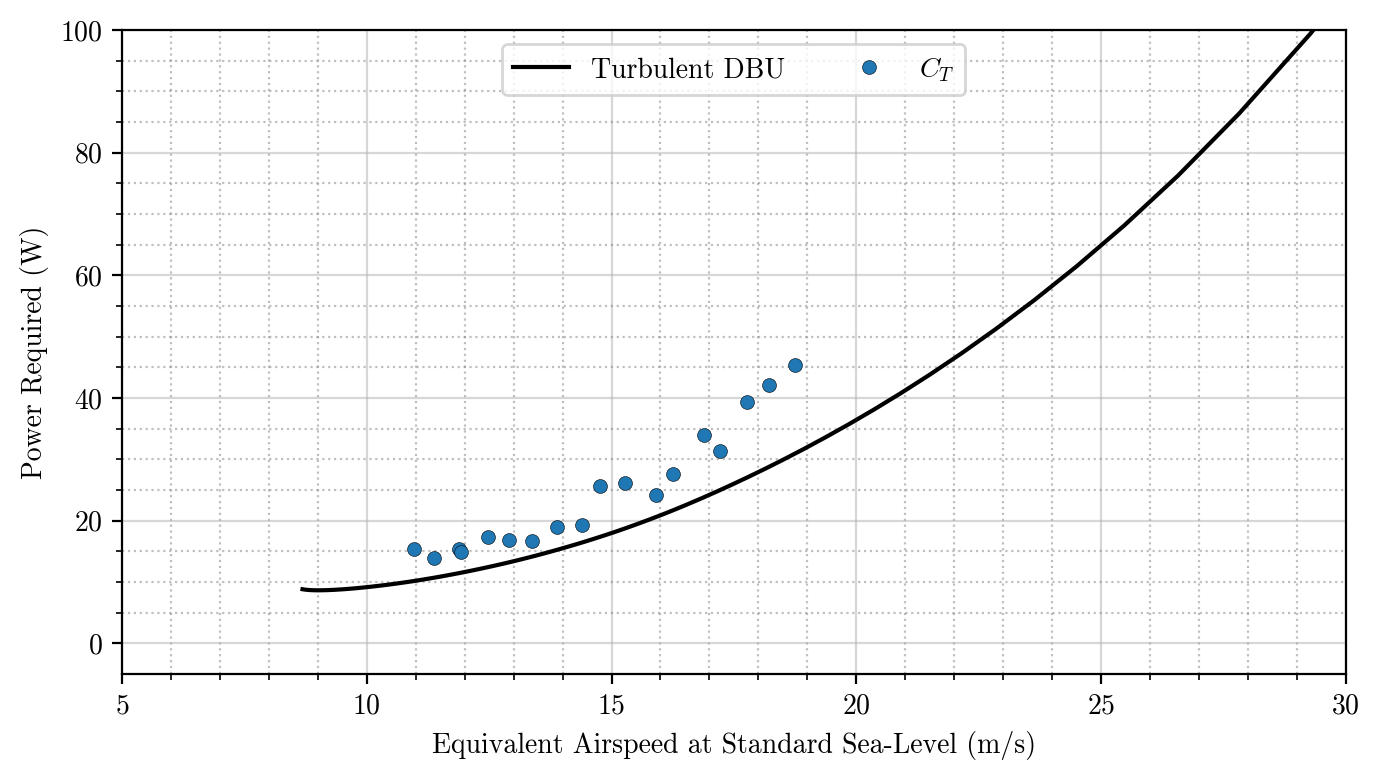

In [26]:
# Plot of Power Required Fits and Data #

[P, EAS] = cl_finders.rawpolar2preqew(linus, cl_means, cd_means)
[P_dbu, EAS_dbu] = cl_finders.rawpolar2preqew(linus, build_turbulent.CL, build_turbulent.CD)

fig_Preq_context = plt.figure(figsize=(7,4), dpi=200)
plt.errorbar(EAS, P, label="$C_T$", linestyle='', marker='o', markersize=5)
plt.plot(EAS_dbu, P_dbu, marker='', color='black', label='Turbulent DBU')

plt.xlabel("Equivalent Airspeed at Standard Sea-Level (m/s)")
plt.ylabel("Power Required (W)")
plt.legend(loc='upper center', ncol=4)
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':', color='grey')
plt.minorticks_on()
plt.tight_layout()
plt.xlim([5,30])
plt.ylim([-5, 100])
plt.show()
main.save_figure(fig_Preq_context, f'{fig_Preq_context=}'.split('=')[0], figure_path, overwrite=True)